<a href="https://colab.research.google.com/github/znoble360/cap4630/blob/master/HW_2/HW_2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for solving linear regression using mini-batch gradient descent

code derived from https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-#scrollTo=Ypw1a8jJdyQm

## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [0]:
# generate m random triples (x, y, z)

m = 100
X1 = 2 * np.random.rand(m, 1) - 1
X2 = 2 * np.random.rand(m, 1) - 1
Y = 3 * X1 + np.random.rand(m, 1)

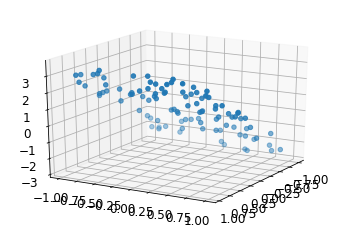

In [3]:
ax = plt.axes(projection='3d')

ax.scatter(X1, X2, Y)

ax.view_init(20, 30)

In [4]:
print(X1.shape)

(100, 1)


In [5]:
# show the first 5 rows
print(X1[:5, :])

[[ 0.43048211]
 [ 0.30309857]
 [ 0.27198378]
 [ 0.59700037]
 [-0.66785822]]


## Combine bias $b=w_0$, weight $w_1$, and weight $w_2$

Linear regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X1, X2])

In [7]:
print(X_b.shape)

(100, 3)


In [8]:
# show the first 5 rows
print(X_b[:5, :])

[[ 1.          0.43048211 -0.82475727]
 [ 1.          0.30309857  0.98244502]
 [ 1.          0.27198378  0.48582422]
 [ 1.          0.59700037 -0.65036418]
 [ 1.         -0.66785822 -0.77139415]]


In [0]:
# create array with a 3d x outlining the plotted area
X_new = np.array([[0, 0], 
                  [1, 1], 
                  [-1, -1], 
                  [-1, 1], 
                  [1, -1]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((5, 1)), X_new])

In [10]:
print(X_new_b)

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]]


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

In [12]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(Y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


## Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
weight = initial_weight
batch_size = 4

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient

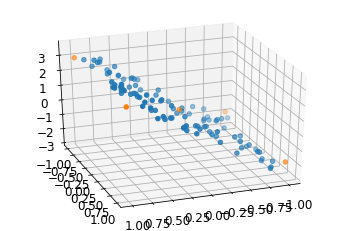

In [14]:
ax = plt.axes(projection='3d')

y_predict = X_new_b.dot(weight)

ax.scatter(X1, X2, Y, "b-")
ax.scatter(X_new.T[0], X_new.T[1], y_predict, "r-")


ax.view_init(30, 70)